Simple Linear Regression

In [1]:
#Importing the necessary packages

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
#Generating a random linear dataset

def fcnCreateDataset(intNumberOfSamples, intVariance, intStep = 2, strCorrelation = "P"):
    intValue = 1
    X = []
    Y = []
    for intCtr in range(1,intNumberOfSamples):
        X.append(intCtr)
        Y.append(intCtr + random.randrange(-intVariance,intVariance))
        if strCorrelation == "P":
            intValue += intStep
        else:
            intValue -= intStep
    
    return np.array(X, dtype=np.float64), np.array(Y, dtype=np.float64),    

In [3]:
#Calculating the Slope and Intercept using OLS Method

def fcnCalculateRegressionParameters(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    
    b = (np.sum(x*y) - (n*x_mean*y_mean))/(np.sum(x**2) - (n*x_mean*x_mean))
    a = y_mean - b * x_mean
    
    return a,b

#Calculating the Slope and Intercept using Covarinace and variance method

def fcnCalculateRegressionParametersUsingStatistics(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    n = len(x)
    
    b = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    a = y_mean - b * x_mean
    
    return a,b

In [67]:
#Calculating the Slope and Intercept using Gradient Descent

def fcnCalculateRegressionParametersUsingGradientDescent(x, y, intLR = 0.0001, intNumberOfIterations = 1000):
    intNumberOfSamples = float(len(x))
    a = 0.0
    b = 0.0
    yPredicted = []
    for intCtr in range(0,intNumberOfIterations):
        da = (-2 / intNumberOfSamples) * np.sum(y - (a + b*x)) 
        db = (-2 / intNumberOfSamples) * np.sum(x * (y - (a + b*x)))
        a = a - intLR * da 
        b = b - intLR * db 
##        print("\n", da, db, a, b)
    
    return a, b

In [5]:
#Prediction and Error Metrics calculation

def fcnPredict(x,a,b):
    y = []
    for intCtr in range(len(x)):
        y.append(a + b*x[intCtr])

    return np.array(y, dtype=np.float64)

def fcnCalculateSSE(yActual, yPredicted):
    return np.sum((yActual - yPredicted) ** 2)

def fcnCalculateSST(yActual, yPredicted):
    return np.sum((yPredicted - np.mean(yActual)) ** 2)

def fcnCalculateR(yActual, yPredicted):
    return 1 - (fcnCalculateSSE(yActual, yPredicted)/fcnCalculateSST(yActual, yPredicted))
    

In [6]:
#Splitting the data

x, y = fcnCreateDataset(500,10,2,"P")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

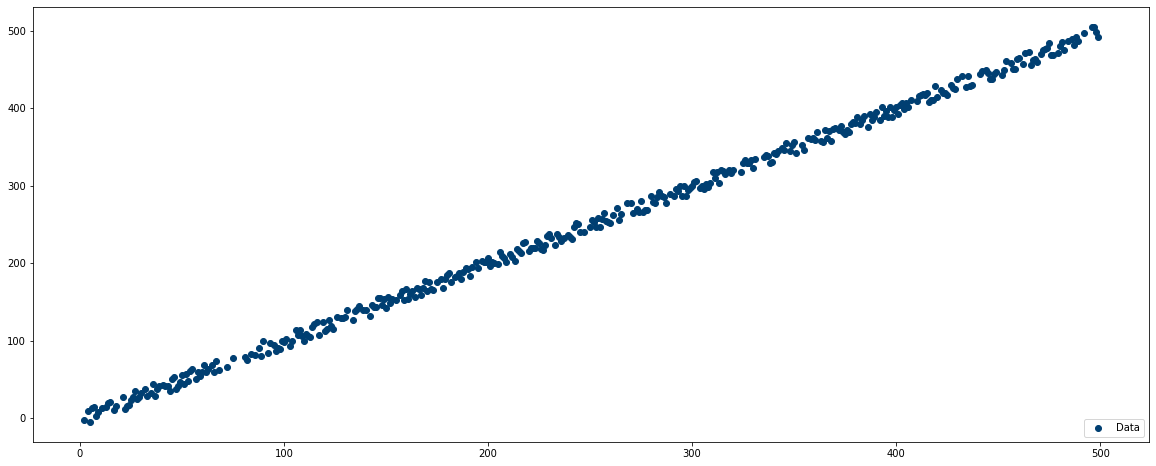

In [7]:
#Plotting the data

plt.figure(figsize=(20,8))
plt.scatter(x_train, y_train, color="#003F72", label = "Data")
plt.legend(loc=4)
plt.show()

In [15]:
#Comparing the Regression Parameters calculated using different methods

In [8]:
a, b = fcnCalculateRegressionParameters(x_train,y_train)
print("Intercept: {}, Slope: {}".format(a,b))

Intercept: -0.6735165922130193, Slope: 0.9999773475127207


In [9]:
a2, b2 = fcnCalculateRegressionParametersUsingStatistics(x_train,y_train)
print("Intercept: {}, Slope: {}".format(a2,b2))

Intercept: -0.6735165922130193, Slope: 0.9999773475127207


In [87]:
a3, b3 = fcnCalculateRegressionParametersUsingGradientDescent(x_train,y_train,0.00001,1000)
print("Intercept: {}, Slope: {}".format(a3,b3))

Intercept: -0.00021133236689560486, Slope: 0.9979364149947971


In [11]:
linear_model = LinearRegression()
linear_model.fit(x_train[:,np.newaxis], y_train[:,np.newaxis])
print("Intercept: {}, Slope: {}".format(linear_model.intercept_, linear_model.coef_[0]))

Intercept: [-0.67351659], Slope: [0.99997735]


In [12]:
#Executing the model and calculating the error

yPredicted = fcnPredict(x_train, a, b)
yPredicted_test = fcnPredict(x_test, a, b)
SSE = fcnCalculateSSE(y_test, yPredicted_test)
SST = fcnCalculateSST(y_test, yPredicted_test)
R2 = fcnCalculateR(y_test, yPredicted_test)

In [88]:
#Executing the model and calculating the error

yPredicted2 = fcnPredict(x_train, a3, b3)
yPredicted_test2 = fcnPredict(x_test, a3, b3)
SSE = fcnCalculateSSE(y_test, yPredicted_test2)
SST = fcnCalculateSST(y_test, yPredicted_test2)
R2 = fcnCalculateR(y_test, yPredicted_test2)

In [13]:
#Generating new data points

xNew, yNew = fcnCreateDataset(600,10,2,"P")
xNew = xNew[:-100:-5]
yNew = fcnPredict(xNew, a, b)

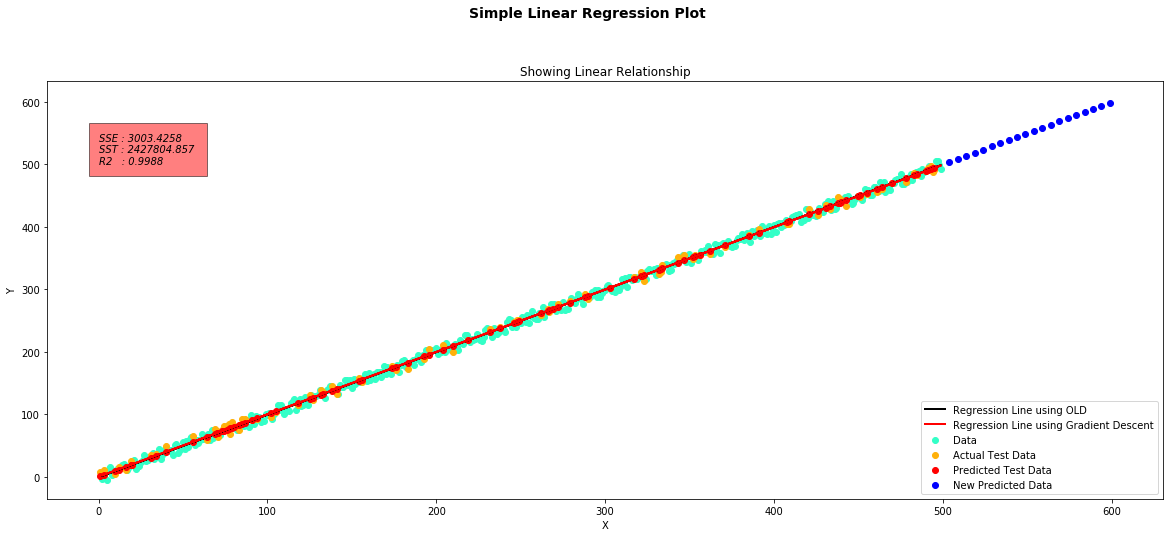

In [94]:
#Plotting all the datapoints

fig = plt.figure(figsize=(20,8))
fig.suptitle("Simple Linear Regression Plot", fontsize=14, fontweight="bold")
ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.85)
ax.set_title("Showing Linear Relationship")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.text(0, 500, "SSE : {} \nSST : {} \nR2   : {}".format(np.round(SSE,4),np.round( SST,4), np.round(R2,4)) , style = 'italic', bbox = {'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.scatter(x_train, y_train, color='#33FFC7',label = 'Data')
plt.scatter(x_test, y_test, color='#FFB10B', label = "Actual Test Data")
plt.scatter(x_test, yPredicted_test, color='r', label = "Predicted Test Data")
plt.scatter(xNew, yNew, color='b', label = "New Predicted Data")
plt.plot(x_train, yPredicted, color = 'k', linewidth = 2, markersize = 12 , label = 'Regression Line using OLD')
plt.plot(x_train, yPredicted2, color = 'r', linewidth = 2, markersize = 12 , label = 'Regression Line using Gradient Descent')
plt.legend(loc=4)
plt.show()